# Test if standard equilibrium calculation is correct

In [59]:
import numpy as np
import pickle
import project_path
import os
from model.neuron_metadata import *
from model.data_accessor import get_data_file_abs_path
from model.neural_model import NeuralModel
from util.plot_util import *
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
N = neuron_metadata_collection.get_size()

In [2]:
I_nA = 1.4
simul_time = 2000

model = NeuralModel(neuron_metadata_collection)
model.init_kunert_2017()
# nA to arbs = *10,000

cur_I_ext = np.zeros(N)
neuron_id = neuron_metadata_collection.get_id_from_name("PLML")
cur_I_ext[neuron_id] = I_nA * 10000
model.cur_I_ext = cur_I_ext
model.set_I_ext_constant_currents({"PLML": I_nA})
equi = model.compute_standard_equilibrium()
model.init_conds = equi

In [3]:
(v_mat, s_mat, v_normalized_mat) = model.run(simul_time)

Timestep 0 out of 2000
Timestep 100 out of 2000
Timestep 200 out of 2000
Timestep 300 out of 2000
Timestep 400 out of 2000
Timestep 500 out of 2000
Timestep 600 out of 2000
Timestep 700 out of 2000
Timestep 800 out of 2000
Timestep 900 out of 2000
Timestep 1000 out of 2000
Timestep 1100 out of 2000
Timestep 1200 out of 2000
Timestep 1300 out of 2000
Timestep 1400 out of 2000
Timestep 1500 out of 2000
Timestep 1600 out of 2000
Timestep 1700 out of 2000
Timestep 1800 out of 2000
Timestep 1900 out of 2000
Total runtime = 12.27s


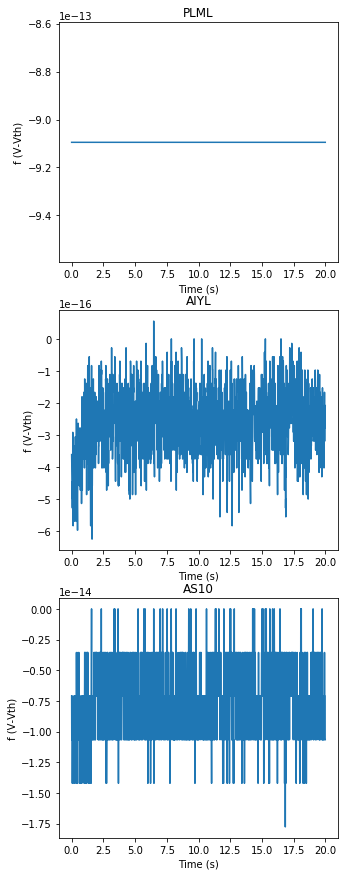

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 15))
plot_potentials(
  neuron_names_to_show = ['PLML', 'AIYL', 'AS10'],
  dynamics = v_normalized_mat,
  is_normalized_v = True,
  dt = model.dt,
  neuron_metadata_collection = neuron_metadata_collection,
  fig_axes = axes)

# Sympy jacobian - Ditched because too slow for N = 600

In [62]:
from numpy import linalg as LA
import sympy as sp
N = 5
v_symbols = sp.symbols(' '.join([('v'+str(i)) for i in range(N)]))
funs = [v_symbols[i]**2 for i in range(N)]
J = sp.Matrix(funs).jacobian(v_symbols)

In [63]:
# This cell is too slow for N = 600 :(
# No result even after 5 minutes
computed_jacobian = J.subs([(v_symbols[i], i) for i in range(N)])
j_np = np.array(computed_jacobian).astype(np.float64)

In [64]:
LA.eigvals(j_np)

array([0., 2., 4., 6., 8.])